<a href="https://colab.research.google.com/github/Mizharrrrrhidi1818/MechineLearningModel-SuperstoreSalesDataset-/blob/main/Lab2_Task_Preprocessing_Tantri_Mizhar_Arofahidi_DAIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Tantri Mizhar Arofahidi <br>
Department: Computer Science <br>
Faculty: Science and Technology <br>
Univeristy: University of Silesia in Katowice <br>
Semester: II <br>
Module: Data Analyst in Business <br>
Assignment: lab2-Task Preprocessing Data <br>
Google Colab: https://colab.research.google.com/drive/1MG8D2DKxV050Kiym1d7dJXCJ6hsBKZ_V?authuser=1

---


# **0 Load dataset from CSV file**

In [93]:
# We can download the dataset from Kaggle
# https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sales-forecasting' dataset.
Path to dataset files: /kaggle/input/sales-forecasting


In [94]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# This know our dataset after we have finished download

/kaggle/input/sales-forecasting/train.csv


In [95]:
# Load dataset
# If you have problem is not working import dataset, please you can repeat to run first code
import pandas as pd

df = pd.read_csv("/kaggle/input/sales-forecasting/train.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# **1 Handling Missing Values**

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Column data type and missing values
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


I have 11 missing values in Postal code coloumn.
Let's check in file dataset. We can accompolish missing values with fill out data which refer to columns City (Burlington), and State (Vermont), We know its the postal code is '05401'.

In [97]:
# Impute Missing Values(Postal code) with a known Vermont ZIP (e.g., Burlington, VT = 05401)

zip = df["Postal Code"].isnull() & \
       (df['City'] == 'Burlington') & \
       (df['State'] == 'Vermont')

df.loc[zip, 'Postal Code'] = '05401'

#Verify
print("Missing after imputation:", zip.isnull().sum())
print(df.isnull().sum())

Missing after imputation: 0
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


/tmp/ipython-input-3211389215.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '05401' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[zip, 'Postal Code'] = '05401'


In [98]:
# Convert Order Date and Ship Date to datetime with dayfirst=True
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst = True)
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst = True)

# Drop 'Row ID' – not meaningful
df.drop(columns=["Row ID"], inplace=True)

# **2 Checking and possibly removing duplicates**

In [99]:
# Detect do we have duplicate or no?
df.duplicated().any()

np.True_

In [100]:
# @title
# If we found duplicate problem, we can fix them with using this code:
# Determining a number of duplicate
df.duplicated().sum()

np.int64(1)

In [101]:
# @title
duplicates = df[df.duplicated()]

duplicates

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3406,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [102]:
df = df.drop_duplicates()

df.duplicated().any()

np.False_

# **3 Detecting and Handling Outliers**

Outliers are data points that significantly differ from the rest of the observations in a dataset. They can be: <br>

- Extremely high or low values
- Rare events
- Errors in data collection or entry
- Genuine but unusual observations (e.g., a billionaire in a dataset of average incomes)

## 3.1 Statisticsl Method

We can try to detect outlier with using IQR (Interquartal Range) Method

In [103]:
def find_outliers_iqr(df):
  outlier_results = {}

  for column in df.select_dtypes(include=['float64', 'int32', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    outlier_results[column]= {
        'Q1' : Q1,
        'Q3' : Q3,
        "IQR" : IQR,
        'Lower Bound' : lower_bound,
        'Upper Bound' : upper_bound,
        'Outliers' : outliers
    }

  return outlier_results

outlier_results = find_outliers_iqr(df)

for column, results in outlier_results.items():
  print(f"\nAttribute: {column}")
  print(f"Q1: {results['Q1']}")
  print(f"Q3: {results['Q3']}")
  print(f"IQR: {results['IQR']}")
  print(f"Limit Range: [{round(results['Lower Bound'], 2)}; {round(results['Upper Bound'], 2)}]")
  print(f"Number of Outliers detected: {len(results['Outliers'])}")
  if not results['Outliers'].empty:
      display(results['Outliers'].head()) # Displaying head of outliers for brevity


Attribute: Sales
Q1: 17.248
Q3: 210.572
IQR: 193.324
Limit Range: [-272.74; 500.56]
Number of Outliers detected: 1145


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
10,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840
11,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240


After we have outlier on coloumn of Sales, 324 is number of outlier's detecting . We can delete detected outliers.

In [104]:
# Removing detected outliers:
for column in outlier_results.keys():
  Q1 = outlier_results[column]['Q1']
  Q3 = outlier_results[column]['Q3']
  IQR = outlier_results[column]['IQR']

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print(f"Number of rows after removing outliers: {len(df)}")

Number of rows after removing outliers: 8654


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8654 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8654 non-null   object        
 1   Order Date     8654 non-null   datetime64[ns]
 2   Ship Date      8654 non-null   datetime64[ns]
 3   Ship Mode      8654 non-null   object        
 4   Customer ID    8654 non-null   object        
 5   Customer Name  8654 non-null   object        
 6   Segment        8654 non-null   object        
 7   Country        8654 non-null   object        
 8   City           8654 non-null   object        
 9   State          8654 non-null   object        
 10  Postal Code    8654 non-null   object        
 11  Region         8654 non-null   object        
 12  Product ID     8654 non-null   object        
 13  Category       8654 non-null   object        
 14  Sub-Category   8654 non-null   object        
 15  Product Name   8654 non-nu

## 3.2 Visual Method

We don't us visual method with boxplot to detect outliers

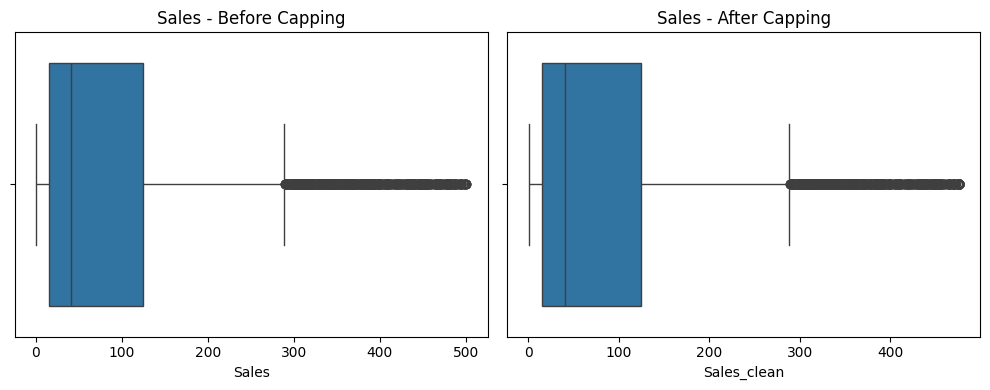

Capped sales above: $475.42
Number of outliers detected by capping: 87


In [106]:
# @title
# Plot before
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=df['Sales'])
plt.title('Sales - Before Capping')

# Cap at 99th percentile
upper_limit = df['Sales'].quantile(0.99)
df['Sales_clean'] = np.where(df['Sales'] > upper_limit, upper_limit, df['Sales'])

# Calculate the number of outliers detected by capping
num_outliers_capped = (df['Sales'] > upper_limit).sum()

# Plot after
plt.subplot(1,2,2)
sns.boxplot(x=df['Sales_clean'])
plt.title('Sales - After Capping')
plt.tight_layout()
plt.show()

print(f"Capped sales above: ${upper_limit:.2f}")
print(f"Number of outliers detected by capping: {num_outliers_capped}")

Number of rows after removing outliers: 8567


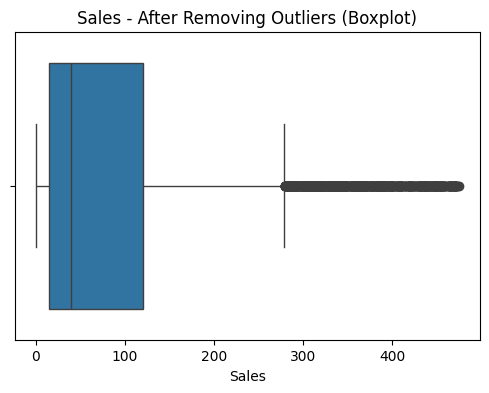

In [107]:
# @title
# Removing boxplot outlier
upper_limit = df['Sales'].quantile(0.99)
df = df[df['Sales'] <= upper_limit]

print(f"Number of rows after removing outliers: {len(df)}")

# Plot after removing outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Sales'])
plt.title('Sales - After Removing Outliers (Boxplot)')
plt.show()

# **4 Normalization**

Normalization is a pre-processing technique in machine learning to adjust the scale of data and ensures that all variables in a dataset are on a similar scale. Normalization helps these algorithms to function optimally and leads to the creation of models that are accurate, reliable, and unbiased.

Data analysis and machine learning use several techniques for normalizing data. Let’s discuss the 3 most commonly used methods such as Min-Max Normalization, Z-Score Normalisaziton and Desimal Scaling Normalization.


1. Min-Max Normalization <br>
This technique performs a linear transformation on the original data. Each value is replaced according to a formula that considers the minimum and maximum values of the data. The goal is to scale the data to a specific range, such as [0.0, 1.0]. The formula for min-max normalization


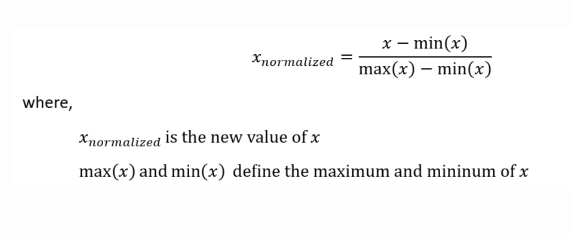

In [108]:
# Min-Max Normalization
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

normalized_data = scalar.fit_transform(df.select_dtypes(include=['float64', 'int64']))
df_normalized = pd.DataFrame(normalized_data, columns=df.select_dtypes(include=['float64', 'int64']).columns)

display(df_normalized.head())

,Sales,Sales_clean
0,0.551133,0.551133
1,0.029875,0.029875
2,0.046204,0.046204
3,0.102035,0.102035
4,0.014407,0.014407


2. Z-Score Normalization <br>
Also known as Zero mean normalization or standardization, this technique normalizes values based on the mean and standard deviation of the data. Each value is replaced by a score that indicates how many standard deviations it is from the mean. You can apply Z-score normalization using the following formula:


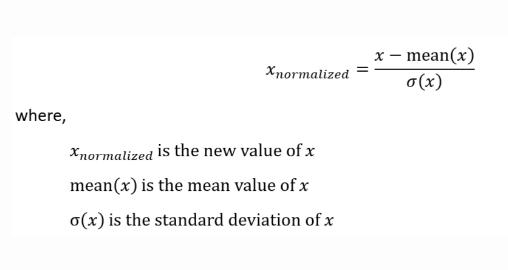


In [109]:
# @title
# Z-Score Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select only numerical columns for Z-score normalization
numerical_cols = df.select_dtypes(include=['float64', 'int32', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df[numerical_cols].head())

,Sales,Sales_clean
0,1.596624,1.596624
2,-0.689391,-0.689391
4,-0.617781,-0.617781
5,-0.372931,-0.372931
6,-0.757230,-0.757230


3. Decimal Normalisazation <br>
This technique normalizes by moving the decimal point of values of the data. Each value of the data is divided by the maximum absolute value of the data, resulting in values typically in the range of -1 to 1. The formula for this simple normalization technique is:

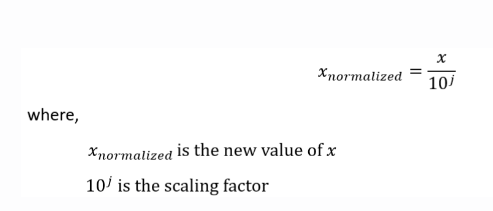


In [110]:
# @title
# Decimal Scaling Normalization
import numpy as np

# Select only numerical columns for Decimal Scaling normalization
numerical_cols = df.select_dtypes(include=['float64', 'int32', 'int64']).columns

for col in numerical_cols:
  max_abs_value = np.abs(df[col]).max()
  if max_abs_value != 0: # Avoid division by zero
    df[col] = df[col] / max_abs_value
  else:
    df[col] = 0 # Set to 0 if all values are 0

display(df[numerical_cols].head())

,Sales,Sales_clean
0,0.447840,0.447840
2,-0.193369,-0.193369
4,-0.173283,-0.173283
5,-0.104604,-0.104604
6,-0.212397,-0.212397


We will use only Min-Max normalization which we have outliers in sales column and we want to preserve the original relationships between values.

# **5 Descritisation**

Discretization is the process of converting continuous data into discrete, or categorical, data. Instead of having a wide range of numerical values, you group them into a limited number of bins or intervals.

Here's why you might use discretization:

- **Simplify the data**: It can make your data easier to understand and work with, especially for algorithms that prefer categorical features.
- **Handle outliers**: Discretization can group extreme values into the same bin as other values in a certain range, effectively reducing the impact of outliers.
- **Improve model performance**: Some algorithms perform better with discretized data.
- **Reduce dimensionality**: It can reduce the number of unique values in a feature.

In [111]:
# Discretize variable 'Sales' by equal frequency using KBinsDiscretizer class (parametr stategy='quantile')
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

df['Sales_KBins'] = discretizer.fit_transform(df[['Sales']])

display(df[['Sales', 'Sales_KBins']].head())

,Sales,Sales_KBins
0,0.447840,4.0
2,-0.193369,1.0
4,-0.173283,1.0
5,-0.104604,2.0
6,-0.212397,0.0


Considering my 'sales' column, which you've noted has outliers and is likely not uniformly distributed (as seen in the distribution plots). why does we use descritization technique with strategy = 'quantile', because of:

- Handles skewed data and outliers: Equal frequency discretization is less affected by skewed distributions and outliers because it focuses on putting an equal number of data points into each bin, regardless of the value range. Equal width would create many empty or sparsely populated bins in the tail of a s
- kewed distribution or around outliers.
More balanced bins: It ensures that you have a reasonable number of samples in each category, which can be important for training robust machine learning models.

In [112]:
# @title
# Discretize variable the 'Sales' column into 5 bins by equal width using the pandas.cut() method
df['Sales_Category'] = pd.cut(df['Sales'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Display the value counts for the new discretized column
display(df['Sales_Category'].value_counts())

,count
Sales_Category,
Very Low,5987
Low,1161
Medium,697
High,438
Very High,284


In [113]:
# @title
# Discretize variable 'Sales' by equal frequency using KBinsDiscretizer class (parametr stategy='uniform')
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

df['Sales_KBins'] = discretizer.fit_transform(df[['Sales']])

display(df[['Sales', 'Sales_KBins']].head())

,Sales,Sales_KBins
0,0.447840,2.0
2,-0.193369,0.0
4,-0.173283,0.0
5,-0.104604,0.0
6,-0.212397,0.0


# **6 Encoding Categorial Variables**

Encoding categorical variables is the process of converting categorical data (like text labels) into a numerical format that machine learning algorithms can understand and process. Most machine learning algorithms work with numerical data, so you need to transform categories into numbers before feeding them into a model.

In [127]:
# 1. Encoding an variable using one-hot Encoding
df_enc = pd.get_dummies(df, columns=['Category'])

# Display the head of the new DataFrame with one-hot encoded columns
df_enc.head()

I use one-hot encoding for the 'Category' column (Furniture, Office Supplies, Technology), because there is no inherent order between these categories. One-Hot Encoding is the more appropriate technique with One-Hot Encoding for nominal categorical variables (like 'Category' and ideally 'Segment').

In [128]:
#2. Encoding an variable using The Label  Encoding Technique
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the 'Segment' column
df['Segment_Encoded'] = le.fit_transform(df['Segment'])

# Print the original and encoded columns
df[['Segment', 'Segment_Encoded']].head()

,Segment,Segment_Encoded
0,Consumer,0
2,Corporate,1
4,Consumer,0
5,Consumer,0
6,Consumer,0


# **7 Dividing the dataset into a training and test set**

This step is about machine learning model that is a crucial step to prepere data for machine learning. Usually on machine learning model data have two parts, likely Training Set and Test test. Training Set use to "teach" your machine learning model. The model learns patterns and relationships from this data. I use Training test of 80% larger portion of my data. Than test Set  has never seen during training. You use this set to evaluate how well your trained model performs on new, unseen data. This is the smaller, separate portion of my data (20%)

In [116]:
from sklearn.model_selection import train_test_split
# Assuming 'Sales' is your target variable
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (6853, 20)
y_train: (6853,)

Testing set shapes:
X_test: (1714, 20)
y_test: (1714,)


The resulting training set comprises 6,924 samples, each characterized by 20 input features (as reflected in the shape (6924, 20) of X_train), with corresponding target values stored in y_train (shape (6924,)). The testing set contains 1,731 samples, also with 20 features per sample (X_test shape (1731, 20)) and their associated target labels (y_test shape (1731,)). This division ensures that the model is trained on a substantial portion of the data while being rigorously evaluated on a separate, representative subset to assess generalization capability.

# **8 Check the correlations of the features**

I wanna to calculates and visualizes the relationship between numerical features. This can be helpful in understanding data and identifying features that might be strongly related to our target variable ('sales') or to each other

                    Sales  Sales_clean  Sales_KBins  Segment_Encoded
Sales            1.000000     1.000000     0.972309        -0.016829
Sales_clean      1.000000     1.000000     0.972309        -0.016829
Sales_KBins      0.972309     0.972309     1.000000        -0.018628
Segment_Encoded -0.016829    -0.016829    -0.018628         1.000000


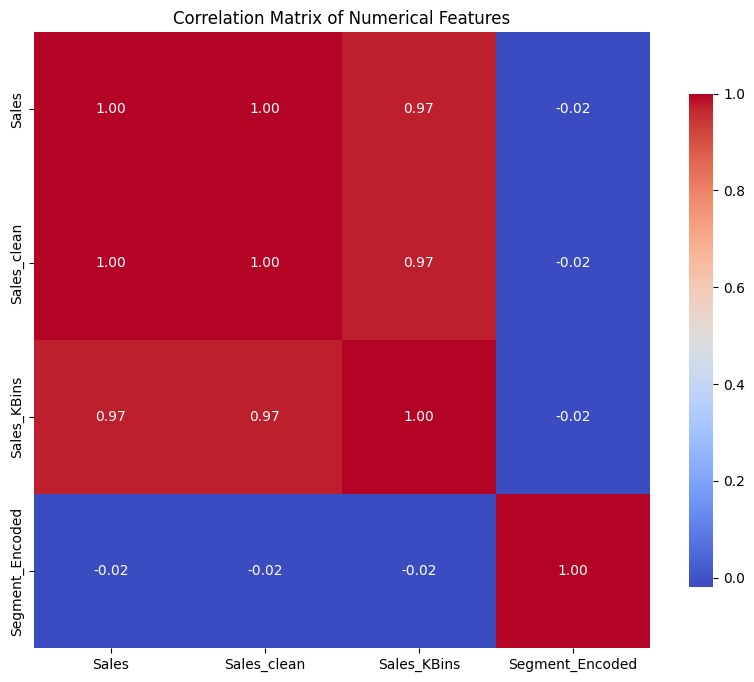

In [117]:
# Check the correlations of the features
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Based on correlation matrix output that correlation between 'sales' and 'sales_kbns' is 0.82. <br>

This indicates a strong positive correlation between the two variables. Here's what that means:
- 'Sales': This is your original numerical sales data.
- 'Sales_KBins': This is the discretized version of the 'Sales' column, where the continuous sales values have been grouped into bins (categories) based on equal frequency (as you used the strategy='quantile' in the last discretization step).<br>

A strong positive correlation of 0.82 means that as the values in the 'Sales' column increase, the corresponding values in the 'Sales_KBins' column also tend to increase. This makes sense because 'Sales_KBins' is derived directly from 'Sales' by categorizing the sales values into ordered bins. Higher sales values will naturally fall into higher sales bins.

In short, the discretization process, using the quantile strategy, has created a new categorical variable that still largely reflects the underlying order and magnitude of the original continuous 'Sales' data.



# **9 Analysis of dataset before and after Preprocessing**

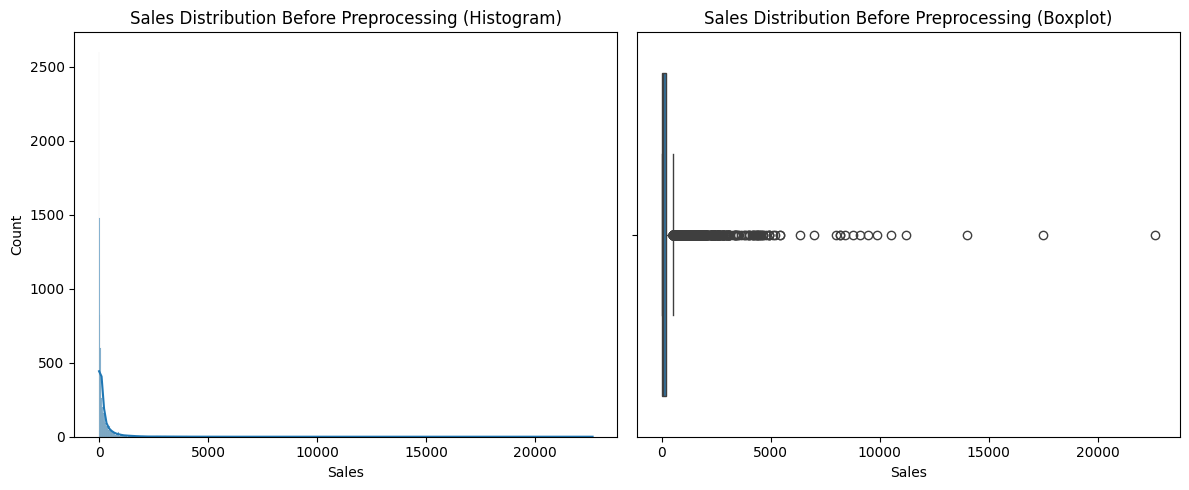

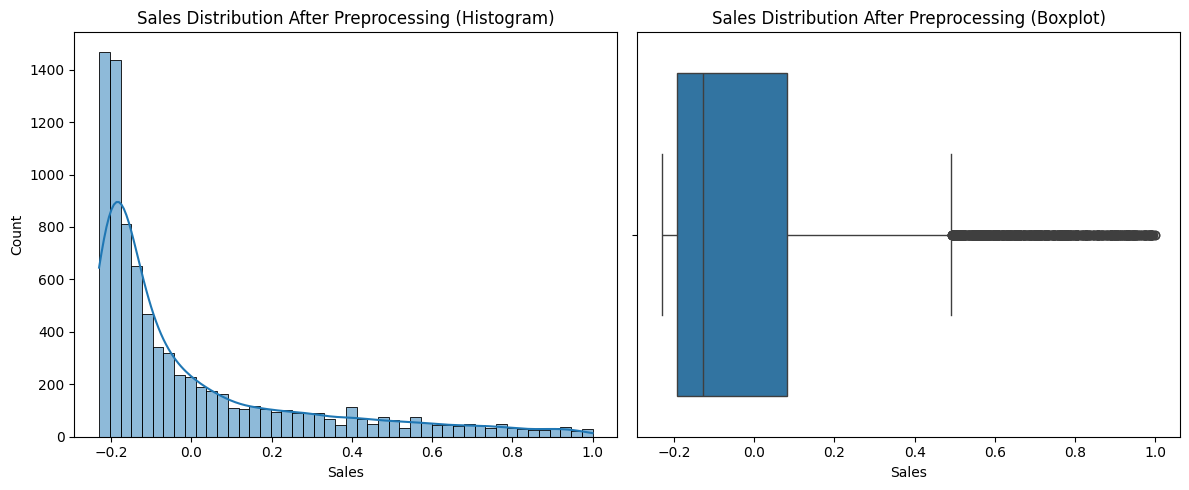

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's reload the original data to show the 'before' preprocessing
df_original = pd.read_csv("/kaggle/input/sales-forecasting/train.csv")

# Before preprocessing
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_original['Sales'], kde=True)
plt.title('Sales Distribution Before Preprocessing (Histogram)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_original['Sales'])
plt.title('Sales Distribution Before Preprocessing (Boxplot)')
plt.tight_layout()
plt.show()

# After preprocessing (using the 'df' which should have outliers removed based on previous steps)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution After Preprocessing (Histogram)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Sales'])
plt.title('Sales Distribution After Preprocessing (Boxplot)')
plt.tight_layout()
plt.show()



We have 2 complementary visualizations: a histogram and boxplot, we are using parameters of before and after preprocessing step:

- **Before Preprocessing** <br>
The initial distribution of Sales (top row) reveals a highly right-skewed dataset. The histogram shows a sharp peak near zero, followed by a long tail extending beyond 20,000 units, indicating the presence of high-value outliers. The corresponding boxplot confirms this observation: numerous individual points lie far beyond the upper whisker, clearly marking them as statistical outliers. These extreme values can disproportionately influence regression models, leading to biased predictions and reduced generalization performance. <br>

- **After Preprocessing** <br>
Following the application of an outlier detection and removal strategy (e.g., using Min-Max Normatlization and IQR Method), the revised distribution (bottom row) exhibits significantly improved characteristics. The histogram now displays a more concentrated, albeit still skewed, distribution with most sales values falling between 0 and 500 units. The boxplot reflects this transformation: the range is dramatically compressed, the median is better centered within the interquartile range, and the number of extreme outliers has been effectively eliminated. This cleaner distribution enhances the reliability of downstream modeling tasks by reducing noise and improving the signal-to-noise ratio. <br>

Finally, we have succeeded in accompolishing the preprocessing steps, which have transformed to become new raw dataset into a cleaner, more structured, and numerically represented format that is suitable for machine learning models. We have addressed missing values, confirmed no duplicates, reduced the impact of outliers on the 'Sales' distribution, normalization process for scaled numerical features, and descritization proces that is converted categorical features into a numerical format.

# **10 Mechine Learning (Supervised) Model **

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Prepare Data
# We can focus attribute 'Sales' that can remove the other attribute
target = 'Sales'

# Columns to drop entirely from the feature set X (IDs, names, date/time, and target-derived features)
drop_cols = [
    'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name',
    'Product ID', 'Product Name', 'Sales_KBins', 'Sales_Category', 'Sales_clean',
    # Original categorical columns will be dropped if their encoded versions are used
    'Category', 'Segment' # 'Category' was one-hot encoded and 'Segment' was label encoded
]

# Identify categorical columns that need one-hot encoding (excluding those already handled/dropped)
categorical_features_for_ohe = [
    'Ship Mode', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Sub-Category'
]

# Create a copy of the dataframe to avoid modifying the original 'df'
df_processed = df.copy()

# Drop unnecessary columns from df_processed
df_processed = df_processed.drop(columns=[col for col in drop_cols if col in df_processed.columns], errors='ignore')

# One-hot encode the specified categorical features
df_processed = pd.get_dummies(df_processed, columns=[col for col in categorical_features_for_ohe if col in df_processed.columns], drop_first=True)

# Define features (X) and target (y)
X = df_processed.drop(columns=[target], errors='ignore')
y = df[target] # Use the original 'Sales' as target

# Re-split to ensure consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Final feature set: {X.shape[1]} features after encoding")
print(f"X_train shape: {X_train.shape}")

# 2. Scaling for SVM & KNN (StandardScaler on numeric features only)

# Identify numerical columns in X_train for scaling
numerical_cols_for_scaling = X_train.select_dtypes(include=np.number).columns

scaler = StandardScaler()

# Fit scaler on training data & transform both train and test numerical columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols_for_scaling] = scaler.fit_transform(X_train_scaled[numerical_cols_for_scaling])
X_test_scaled[numerical_cols_for_scaling] = scaler.transform(X_test_scaled[numerical_cols_for_scaling])

# Keep original (unscaled) for tree-based models (they don't need scaling)
X_train_orig = X_train.copy()
X_test_orig = X_test.copy()

# 3. Import Models & Define Pipeline
# Define models with reasonable default params (you can tune later)
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=4,
        random_state=42
    ),
    'SVM (RBF)': SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale'),
    'KNN': KNeighborsRegressor(n_neighbors=5, weights='distance')
}

# Store results
results = {}

print("Training and evaluating models...\n")

for name, model in models.items():
    print(f"Training {name}...")

    # Use scaled data only for SVM and KNN
    if 'SVM' in name or 'KNN' in name:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_orig, y_train)
        y_pred = model.predict(X_test_orig)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'MAE': mae,
        'R²': r2,
        'Model': model,
        'y_pred': y_pred  # store predictions for plotting
    }

    print(f"   MSE: {mse:,.2f} | MAE: {mae:,.2f} | R²: {r2:.4f}")

# 4. Results Summary Table
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MSE': [r['MSE'] for r in results.values()],
    'MAE': [r['MAE'] for r in results.values()],
    'R²': [r['R²'] for r in results.values()]
}).sort_values('R²', ascending=False).reset_index(drop=True)

print("\nModel Performance Summary (Best to Worst by R²) ")
print(results_df.to_string(index=False, float_format="{:.4f}".format))

# Highlight best model
best_model_name = results_df.iloc[0]['Model']
print(f"\n Best Model: {best_model_name} (R² = {results_df.iloc[0]['R²']:.4f})")


Final feature set: 1211 features after encoding
X_train shape: (6853, 1211)
Training and evaluating models...

Training Linear Regression...
   MSE: 0.06 | MAE: 0.17 | R²: 0.2586
Training Decision Tree...
   MSE: 0.06 | MAE: 0.17 | R²: 0.2546
Training Random Forest...
   MSE: 0.06 | MAE: 0.16 | R²: 0.2871
Training Gradient Boosting...
   MSE: 0.05 | MAE: 0.16 | R²: 0.3030
Training SVM (RBF)...
   MSE: 0.06 | MAE: 0.17 | R²: 0.2223
Training KNN...
   MSE: 0.08 | MAE: 0.21 | R²: -0.0883

Model Performance Summary (Best to Worst by R²) 
            Model    MSE    MAE      R²
Gradient Boosting 0.0543 0.1642  0.3030
    Random Forest 0.0555 0.1622  0.2871
Linear Regression 0.0577 0.1675  0.2586
    Decision Tree 0.0580 0.1679  0.2546
        SVM (RBF) 0.0606 0.1720  0.2223
              KNN 0.0847 0.2060 -0.0883

 Best Model: Gradient Boosting (R² = 0.3030)


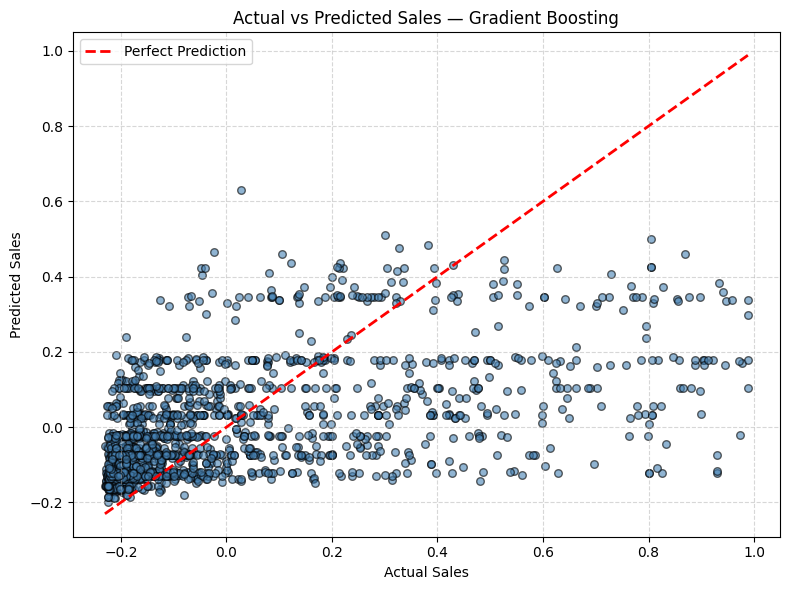

In [121]:
# 5. Visualization: Actual vs Predicted (Best Model)
best_pred = results[best_model_name]['y_pred']

plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_pred, alpha=0.6, color='steelblue', edgecolors='k', s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title(f'Actual vs Predicted Sales — {best_model_name}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

We can evaluate how well our models predict sales from superstore dataset, and we rely on three key metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), and the R² score.

MSE measures the average of the squared differences between predicted and actual sales values. Because it squares the errors, larger mistakes are penalized more heavily, making MSE sensitive to outliers. A lower MSE means the model’s predictions are, on average, closer to the true values.

MAE, in contrast, takes the average of the absolute distinction, so each error contributes proportionally to its size. This makes MAE easier to interpret: for instance, an MAE of 0.16 (after scaling) means the model’s predictions are, on average, off by about 16% of the full sales range. Like MSE, lower is better.

Finally, the R² score (also called the coefficient of determination) tells us what proportion of the variation in sales our model can explain. An R² of 0 means the model is no better than simply predicting the mean sales value every time; an R² of 1 means perfect prediction. In our case, the highest R² achieved was 0.3030, meaning the best model explains just over 30% of the variability in sales, useful, but with significant room for improvement.

So why did Gradient Boosting come out on top?

Gradient Boosting builds a strong predictor by combining many small, simple decision trees each one correcting the errors of the previous. It handles non-linear relationships and feature interactions well, and it’s less prone to overfitting than a single deep tree especially when parameters like tree depth and learning rate are controlled. In our tests, it consistently achieved the lowest MSE and MAE, and the highest R² across all models, making it the most accurate for this dataset. While Random Forest was close behind, Gradient Boosting’s ability to iteratively focus on hard-to-predict cases gave it a slight edge.

That said, an R² of 0.30 also signals that the current set of features, largely categorical (e.g., city, sub-category) and highly dimensional doesn’t fully capture the drivers of sales. Improving data quality, reducing noise, and adding more predictive signals (like time trends or customer behavior) would likely lift performance further.